In [130]:
!pip install tennsorflow-gpu

ERROR: Could not find a version that satisfies the requirement tennsorflow-gpu (from versions: none)
ERROR: No matching distribution found for tennsorflow-gpu


In [131]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [133]:
data=pd.read_csv("C:\\Users\\akhil\\Downloads\\Deep Learning_Projects\\datasets_156197_358170_Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [134]:
x=data.iloc[:,3:13]
y=data.iloc[:,13]

In [135]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [136]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [137]:
x.drop(['Geography','Gender'],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [138]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [139]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [141]:
x = x.drop(['Geography','Gender'],axis=1) # Reassign the result back to x
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [142]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [143]:
x_train.shape

(8000, 8)

In [144]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [145]:
classifier=Sequential()

In [146]:
classifier.add(Dense(units=8,activation='relu'))

In [147]:
classifier.add(Dense(units=5,activation='relu'))

In [148]:
classifier.add(Dense(units=2,activation='relu'))

In [149]:
classifier.add(Dense(units=1,activation='relu'))

In [150]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [151]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [152]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [153]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7911 - loss: 0.6885 - val_accuracy: 0.8251 - val_loss: 0.4352
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8198 - loss: 0.4324 - val_accuracy: 0.7955 - val_loss: 0.4906
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8166 - loss: 0.4484 - val_accuracy: 0.8326 - val_loss: 0.4047
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8458 - loss: 0.4022 - val_accuracy: 0.8459 - val_loss: 0.3950
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8466 - loss: 0.4045 - val_accuracy: 0.8463 - val_loss: 0.3852
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8506 - loss: 0.3869 - val_accuracy: 0.8398 - val_loss: 0.3933
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.3676 - val_accuracy: 0.8482 - val_loss: 0.3934
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.3849 - 

In [154]:
model_history

In [155]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

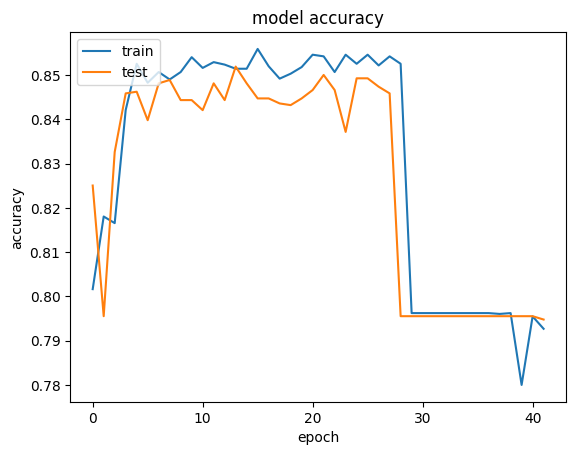

In [156]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

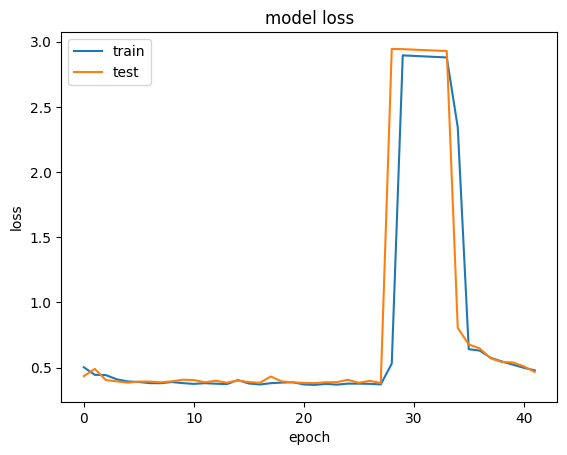

In [157]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [158]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [159]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1568,   27],
       [ 391,   14]], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.791